## Load Book, User and Rating Information datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
book_rat = pd.read_csv('/content/drive/My Drive/book_ratings.dat',sep='\t')
book_info = pd.read_csv('/content/drive/My Drive/bo_info.txt',sep='\t')
user_info = pd.read_csv('/content/drive/My Drive/users_info.dat',sep='\t')

In [ ]:
book_info.info()

book_info.columns = book_info.columns.str.strip().str.lower().str.replace('-', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book_ID              17384 non-null  int64 
 1   ISBN                 17384 non-null  object
 2   Book-Title           17384 non-null  object
 3   Book-Author          17383 non-null  object
 4   Year-Of-Publication  17384 non-null  object
 5   Publisher            17384 non-null  object
 6   Image-URL-S          17384 non-null  object
 7   Image-URL-M          17382 non-null  object
 8   Image-URL-L          17383 non-null  object
 9   Unnamed: 9           973 non-null    object
 10  Unnamed: 10          36 non-null     object
 11  Unnamed: 11          5 non-null      object
 12  Unnamed: 12          1 non-null      object
dtypes: int64(1), object(12)
memory usage: 1.7+ MB


## Clean the data

In [ ]:
book_info.isna().sum()


book_id                    0
isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
image_url_s                0
image_url_m                2
image_url_l                1
unnamed: 9             16411
unnamed: 10            17348
unnamed: 11            17379
unnamed: 12            17383
dtype: int64

In [ ]:
book_info=book_info.iloc[:,:9]


In [ ]:
book_info=book_info.dropna()


In [ ]:
book_info.isna().sum() #all Null values removed


book_id                0
isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64

In [ ]:
book_info.head(5)


,book_id,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
1,2,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp,Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
2,3,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
3,4,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
4,5,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...


In [ ]:
book_info['image_url_l'][2]


'http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg'

In [ ]:
book_info.publisher = book_info.publisher.str.replace('&amp', '&', regex=False)


In [ ]:
book_info=book_info.drop('image_url_s',axis=1)
book_info=book_info.drop('image_url_l',axis=1)
book_info=book_info.drop('image_url_m',axis=1)

In [ ]:
book_info.head(5)

,book_id,isbn,book_title,book_author,year_of_publication,publisher
0,1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
1,2,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &
2,3,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
3,4,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
4,5,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press


In [ ]:
len(book_info.book_id.unique())


# In[132]:


book_info[book_info['book_id']==11960]


,book_id,isbn,book_title,book_author,year_of_publication,publisher
11959,11960,60192356,Other Worlds,Barbara Michaels,1999,HarperCollins Publishers


In [ ]:
book_rat.info()

book_rat.columns = book_rat.columns.str.strip().str.lower().str.replace('-', '_') # clean column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62656 entries, 0 to 62655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   user    62656 non-null  int64
 1   item    62656 non-null  int64
 2   rating  62656 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [ ]:
book_rat.isna().sum() #NO NULL VALUES PRESENT


user      0
item      0
rating    0
dtype: int64

In [ ]:
book_rat.head(10)


,user,item,rating
0,1,6264,7
1,1,4350,7
2,1,6252,5
3,1,202,9
4,1,6266,6
5,1,4810,5
6,1,6251,9
7,1,160,9
8,1,161,8
9,1,631,10


In [ ]:
len(book_rat.item.unique())


14684

In [ ]:
book_rat[book_rat['user']==2945]


,user,item,rating
62626,2945,4303,8
62627,2945,13214,7
62628,2945,956,7
62629,2945,8524,6
62630,2945,12915,6
62631,2945,6881,7
62632,2945,3701,4
62633,2945,12005,6
62634,2945,1957,7
62635,2945,366,4


In [ ]:
user_info.info()

user_info.columns = user_info.columns.str.strip().str.lower().str.replace('-', '_') # clean column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User-ID   2946 non-null   int64 
 1   Location  2946 non-null   object
 2   Age       2946 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 69.2+ KB


In [ ]:
user_info.isna().sum() #NO NULL VALUES PRESENT


user_id     0
location    0
age         0
dtype: int64

In [ ]:
user_info.head(10)


,user_id,location,age
0,1,"minneapolis, minnesota, usa",24
1,2,"san diego, california, usa",20
2,3,"novinger, missouri, usa",16
3,4,"sonoma, california, usa",34
4,5,"berkeley, california, usa",23
5,6,"king of prussia, ,",36
6,7,"berkeley, ,",22
7,8,"rennes, bretagne, france",22
8,9,"st. louis, missouri, usa",36
9,10,"minneapolis, minnesota, usa",26


In [ ]:
user_info.location.values


array(['minneapolis, minnesota, usa', 'san diego, california, usa',
       'novinger, missouri, usa', ..., 'storm lake, iowa, usa',
       'lake george, new york, usa', 'pismo beach, california, usa'],
      dtype=object)

In [ ]:
user_location_expanded = user_info.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
user_info = user_info.join(user_location_expanded)

In [ ]:
user_info=user_info.drop('location',axis=1)


In [ ]:
user_info.age.unique() #age must be between 5-100


array([ 24,  20,  16,  34,  23,  36,  22,  26,  30,  27,  46,  42,  25,
        29,  68,  48,  39,  33,  18,  66,  60,  32,  28,  35,  45,  31,
        62,  51,   8,  49,  21,  44, 239,  47,  37,  65,  15,  58,  38,
        41, 201,  57,  40,  53,  43,  54,  19,  56,  52,  55,  67,  13,
        59,  61,  11,  75,  12,  50,  17,  63,  14,   9, 103,  71,  77,
        83,  76, 136,   1,  72,  70,  69, 168, 148,  90,  80,  64,  73,
        81,  82, 100,  79, 116,   4, 204,   2, 101])

In [ ]:
user_info[user_info['age']>100]=50
user_info[user_info['age']<5]=50


In [ ]:
user_info.age.unique() #age must be between 5-100


array([ 24,  20,  16,  34,  23,  36,  22,  26,  30,  27,  46,  42,  25,
        29,  68,  48,  39,  33,  18,  66,  60,  32,  28,  35,  45,  31,
        62,  51,   8,  49,  21,  44,  50,  47,  37,  65,  15,  58,  38,
        41,  57,  40,  53,  43,  54,  19,  56,  52,  55,  67,  13,  59,
        61,  11,  75,  12,  17,  63,  14,   9,  71,  77,  83,  76,  72,
        70,  69,  90,  80,  64,  73,  81,  82, 100,  79])

In [ ]:
user_info[user_info['user_id']==2945]


,user_id,age,city,state,country
2944,2945,34,lake george,new york,usa


## Merge Books and Ratings data

In [ ]:
books_with_ratings = book_rat.join(book_info.set_index('book_id'), on='item')


In [ ]:
books_with_ratings.dropna(subset=['book_title'], inplace=True) # remove rows with missing title/author data


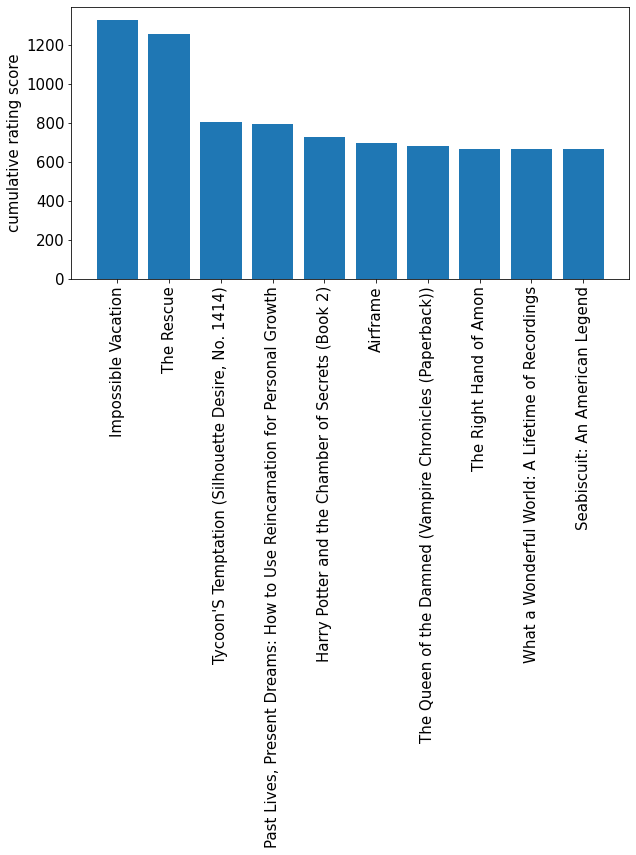

In [ ]:
cm_rtg = books_with_ratings.groupby('book_title').rating.sum()
cm_rtg = cm_rtg.sort_values(ascending=False)[:10]
idx = cm_rtg.index.tolist() 
vals = cm_rtg.values.tolist() 

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(range(len(idx)), vals)
plt.xticks(range(len(idx)), idx, rotation='vertical')
plt.ylabel('cumulative rating score')
plt.show()


In [ ]:
books_with_ratings.groupby('book_title').item.nunique().sort_values(ascending=False)[:581]


book_title
Pet Sematary                                     6
Wuthering Heights                                5
The Subtle Knife (His Dark Materials, Book 2)    5
Best Friends                                     4
Stardust                                         4
                                                ..
Mr. Maybe                                        2
Fair Ball: A Fan's Case for Baseball             2
Dude, Where's My Country?                        2
Zlata's Diary: A Child's Life in Sarajevo        2
High Society                                     1
Name: item, Length: 581, dtype: int64

In [ ]:
multiple_isbns = books_with_ratings.groupby('book_title').isbn.nunique()
multiple_isbns.value_counts()

1    13433
2      509
3       59
4        9
5        2
6        1
Name: isbn, dtype: int64

In [ ]:
book_names = books_with_ratings.book_title.unique()
book_names=book_names.tolist()
book_names[:10]

['Something Wicked This Way Comes',
 'The Mists of Avalon',
 'Sacred Sins',
 'What a Wonderful World: A Lifetime of Recordings',
 'A Coral Kiss',
 'To Marry McAllister  (Bachelor Cousins) (Harlequin Presents, No. 2273)',
 'Love Always Remembers: A Book of Poems',
 'The Subtle Knife (His Dark Materials, Book 2)',
 'Martian Chronicles',
 'Just Here Trying to Save a Few Lives : Tales of Life and Death from the ER']

In [ ]:
for i in book_names:
    mask = books_with_ratings['book_title']==i
    c=books_with_ratings[books_with_ratings['book_title']==i].iloc[0,3]
    books_with_ratings.loc[mask,'isbn']=c

In [ ]:
books_with_ratings.to_csv('mod_books')


In [ ]:
books_with_ratings

,user,item,rating,isbn,book_title,book_author,year_of_publication,publisher
0,1,6264,7,553280325,Something Wicked This Way Comes,Ray Bradbury,1983,Bantam
1,1,4350,7,345441184,The Mists of Avalon,MARION ZIMMER BRADLEY,2000,Del Rey
2,1,6252,5,553265741,Sacred Sins,Nora Roberts,1990,Bantam Books
3,1,202,9,195086295,What a Wonderful World: A Lifetime of Recordings,Bob Thiele,1995,Oxford University Press
4,1,6266,6,446363499,A Coral Kiss,Jayne Ann Krentz,1992,Warner Books
...,...,...,...,...,...,...,...,...
62651,2945,15719,8,571169341,Arcadia,Jim Crace,1997,Ecco
62652,2945,11960,6,60192356,Other Worlds,Barbara Michaels,1999,HarperCollins Publishers
62653,2945,8515,9,067147071X,MR CLEMENS TWAIN P (Touchstone Books (Paperback)),Justin Kaplan,1983,Touchstone
62654,2945,9417,7,385247192,Mistress of the Empire,Raymond E. Feist,1992,Doubleday Books


In [ ]:
books_with_ratings[books_with_ratings.book_title=='Jane Eyre'].head()


,user,item,rating,isbn,book_title,book_author,year_of_publication,publisher
1057,52,4288,8,451523326,Jane Eyre,Charlotte Bronte,1988,Signet Classics
1686,76,4288,8,451523326,Jane Eyre,Charlotte Bronte,1988,Signet Classics
16633,786,9847,7,451523326,Jane Eyre,Charlotte Bronte,0,Barnes Noble Classics
38442,1766,12162,10,451523326,Jane Eyre,Charlotte Bronte,1981,Bantam Books
47622,2249,12162,10,451523326,Jane Eyre,Charlotte Bronte,1981,Bantam Books


## Merge Book info, Ratings info and User info Data

In [ ]:
books_users_ratings = books_with_ratings.join(user_info.set_index('user_id'), on='user')


## Combine User Info and Ratings data

In [ ]:
user_item_rating = books_users_ratings[['user', 'isbn', 'rating']]
user_item_rating.head()

,user,isbn,rating
0,1,553280325,7
1,1,345441184,7
2,1,553265741,5
3,1,195086295,9
4,1,446363499,6


## Train Test Split

In [ ]:

from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)


In [ ]:
u_unique_train = train_data.user.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

b_unique_train = train_data.isbn.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_book2idx = {o:i for i, o in enumerate(b_unique_train)}


u_unique_test = test_data.user.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}
b_unique_test = test_data.isbn.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique_test)}



train_data['u_unique'] = train_data['user'].map(train_data_user2idx)
train_data['b_unique'] = train_data['isbn'].map(train_data_book2idx)

test_data['u_unique'] = test_data['user'].map(test_data_user2idx)
test_data['b_unique'] = test_data['isbn'].map(test_data_book2idx)

train_data = train_data[['u_unique', 'b_unique', 'rating']]
test_data = test_data[['u_unique', 'b_unique', 'rating']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## Generate User Book Rating Matrix (generally called as the user item matrix)

In [ ]:
num_of_users = train_data['u_unique'].nunique()
num_of_books = train_data['b_unique'].nunique()

In [ ]:

train_matrix = np.zeros((num_of_users, num_of_books))

for i in train_data.itertuples(): 
    train_matrix[i[1]-1, i[2]-1] = i[3]

In [ ]:
num_of_users = test_data['u_unique'].nunique()
num_of_books = test_data['b_unique'].nunique()

test_matrix = np.zeros((num_of_users, num_of_books))

for i in test_data.itertuples(): 
    test_matrix[i[1]-1, i[2]-1] = i[3] 

In [ ]:
train_mat = pd.DataFrame(train_matrix)
train_mat.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13124,13125,13126,13127,13128,13129,13130,13131,13132,13133,13134,13135,13136,13137,13138,13139,13140,13141,13142,13143,13144,13145,13146,13147,13148,13149,13150,13151,13152,13153,13154,13155,13156,13157,13158,13159,13160,13161,13162,13163
0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,7.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Compare accuracy between User based Collaborative Filtering, Item based Collaborative Filtering, Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF)

## User and Item based Collaborative Filtering

In [ ]:
train_matrix_small = train_matrix[:10000, :10000]
test_matrix_small = test_matrix[:10000, :10000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
user_similarity.shape

(1295, 1295)

In [ ]:
def predict(ratings, similarity, type='user'): 
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict(train_matrix_small, item_similarity, type='item')
user_prediction = predict(train_matrix_small, user_similarity, type='user')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

# Call on test set to get error from each approach ('user' or 'item')
print("User-based RMSE:", rmse(user_prediction, test_matrix_small))
print("Item-based RMSE:",rmse(item_prediction, test_matrix_small))

User-based RMSE: 8.10255453213717
Item-based RMSE: 8.112654817764634


In [ ]:
!pip install surprise
from surprise import Reader, Dataset


     |████████████████████████████████| 11.8MB 260kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670913 sha256=87798efb9104104c39954d42d76ae73f099b1f1d1fd9225538c8241a55c40888
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset


In [ ]:
reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(user_item_rating, reader)

## Singular Value Decomposition (SVD)

In [ ]:
from surprise import SVD, NMF, model_selection, accuracy

In [ ]:
# Train on books dataset
get_ipython().run_line_magic('time', "model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4969  1.4906  1.4761  1.4915  1.4957  1.4902  0.0074  
Fit time          2.93    2.92    2.89    2.91    2.89    2.91    0.02    
Test time         0.08    0.08    0.14    0.08    0.08    0.09    0.02    
CPU times: user 15.6 s, sys: 23.9 ms, total: 15.6 s
Wall time: 15.6 s


{'fit_time': (2.93355131149292,
  2.922685384750366,
  2.8945486545562744,
  2.9118118286132812,
  2.892516613006592),
 'test_rmse': array([1.49688581, 1.49059006, 1.47606735, 1.49150808, 1.49574357]),
 'test_time': (0.08224296569824219,
  0.08293986320495605,
  0.14087677001953125,
  0.08249998092651367,
  0.08230018615722656)}

In [ ]:
crval = model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4899  1.5029  1.4942  1.4876  1.4785  1.4906  0.0080  
Fit time          2.93    2.91    2.92    2.91    2.90    2.91    0.01    
Test time         0.08    0.08    0.14    0.09    0.14    0.11    0.03    


In [ ]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predictt ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.4753


1.4752956737114107

## Non-negative Matrix Factorization (NMF)

In [ ]:

model = NMF()

model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)

RMSE: 2.6383


2.63834932513524

## SVD gives the least Root Mean Squared Error (RMSE) score

## Test for a user

In [ ]:
uid = 69  # the user_id int
iid = '61057819' # the unique_isbn string

In [ ]:
pred = model.predict(uid, iid, verbose=True)


user: 69         item: 61057819   r_ui = None   est = 7.38   {'was_impossible': False}


In [ ]:
print(" Estimated rating for the book :",pred.est)
actual_rtg = user_item_rating[(user_item_rating.user==pred.uid) & (user_item_rating.isbn==pred.iid)].rating.values[0]
print("The actual rating given :" ,actual_rtg)

 Estimated rating for the book : 7.381942696225626
The actual rating given : 10


In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=100):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    print(len(top_n[uid]))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [ ]:
reading_list = defaultdict(list)

In [ ]:
print(predictions)

[Prediction(uid=848, iid='440224748', r_ui=9.0, est=5.628132949150251, details={'was_impossible': False}), Prediction(uid=474, iid='3442439019', r_ui=8.0, est=6.45049196554792, details={'was_impossible': False}), Prediction(uid=783, iid='345395379', r_ui=9.0, est=6.2710289135780855, details={'was_impossible': False}), Prediction(uid=751, iid='515133639', r_ui=7.0, est=5.725551254318869, details={'was_impossible': False}), Prediction(uid=2192, iid='345312538', r_ui=9.0, est=7.952368599592928, details={'was_impossible': True, 'reason': 'User and item are unknown.'}), Prediction(uid=2849, iid='8445070762', r_ui=5.0, est=7.952368599592928, details={'was_impossible': True, 'reason': 'User and item are unknown.'}), Prediction(uid=2746, iid='380819619', r_ui=7.0, est=5.885589408716322, details={'was_impossible': False}), Prediction(uid=892, iid='006091341X', r_ui=9.0, est=5.569290506876576, details={'was_impossible': False}), Prediction(uid=1518, iid='671003755', r_ui=8.0, est=5.3366668233346

In [ ]:
books_bought = pd.read_csv('/content/drive/My Drive/book_history.dat',sep='\t')



In [ ]:
books_bought.head(100)

,user,item,accessed
0,1,152,1
1,1,153,1
2,1,2176,1
3,1,154,1
4,1,734,1
...,...,...,...
95,1,1315,1
96,1,4707,1
97,1,6239,1
98,1,6242,1


In [ ]:
books_bought.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272678 entries, 0 to 272677
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user      272678 non-null  int64
 1   item      272678 non-null  int64
 2   accessed  272678 non-null  int64
dtypes: int64(3)
memory usage: 6.2 MB


In [ ]:
#books_bought[books_bought['user']==1]['item'].unique().tolist()

In [ ]:
books_users_ratings[books_users_ratings['book_title']=='Something Wicked This Way Comes']['item'].unique().tolist()

[6264, 1878]

In [ ]:
books_b = pd.DataFrame({'user':[],'isbn':[]})

books_b

,user,isbn


In [ ]:
books_users_ratings[books_users_ratings['isbn']=='61057819']['item'].values[0]

2148

In [ ]:
pred = model.test(testset)
top_n = get_top_n(pred)



def get_reading_list(userid):

    reading_list = defaultdict(list)
    print(books_b)
    for i in [10,20,30,40,50,60,2000]:
      top_n = get_top_n(predictions, n=i)
      print(len(top_n[userid]))
      for n in top_n[userid]:
          book, rating = n
          title = books_users_ratings.loc[books_users_ratings.isbn==book].book_title.unique()[0]
          item=books_users_ratings[books_users_ratings['book_title']==title]['isbn'].unique().tolist()

          user_seen = books_b[books_b['user']==userid]['isbn'].unique().tolist()
          
          if item[0] not in user_seen:
            reading_list[title] = [rating]
      if(len(reading_list)>15):
        
        break;
    return reading_list

32


## Recommendations for User 69

In [ ]:
rlist = get_reading_list(userid=69)
for book, rating in rlist.items():
    print(book ,":" ,rating)

Empty DataFrame
Columns: [user, isbn]
Index: []
32
10
32
20
The Last Suppers : [8.833387509129427]
Wolf in the Shadows : [7.952368599592928]
Got a Hold on You : [7.952368599592928]
Bubbles Unbound : [7.952368599592928]
I Got You, Babe : [7.940194164029484]
The Last Male Virgin : [7.651884020488228]
Gifts of the Spirit : Living the Wisdom of the Great Religious Traditions : [7.025383255427098]
Strawberry Shortcake Murder: A Hannah Swensen Mystery (Hannah Swensen Mysteries (Paperback)) : [6.971219681096051]
Cold Paradise (Stone Barrington Novels (Paperback)) : [6.894501004751066]
Tiles and Tribulations (Den of Antiquity Mysteries) : [6.792921172980117]
A Tax Deductible Death : [6.710255658430411]
Almost Like Being in Love : A Novel : [6.673624902003045]
The Complete Short Stories of Mark Twain (Bantam Classic) : [6.576815675728349]
Keepsake Crimes (First Scrapbooking Mystery) : [6.281697329601341]
Self Analysis : [6.145640995276253]
The Twentieth Century Collection: Eight Extraordinary O